In [1]:
%load_ext autoreload
%autoreload 2
%cd '~/carl/research/dev/PlasticineLab'
%pwd
%matplotlib inline
import matplotlib.pyplot as plt
import taichi as ti
import numpy as np
import cv2
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from plb.utils.visualization_utils import save_rgb
target_path = './datasets/0513_Roll/target'
if not os.path.exists(target_path):
    os.makedirs(target_path, exist_ok=True)

/home/jianrenw/carl/research/dev/PlasticineLab
[Taichi] mode=release
[Taichi] preparing sandbox at /tmp/taichi-tbxfd4zv
[Taichi] version 0.7.26, llvm 10.0.0, commit e37bdb5e, linux, python 3.8.11
[I 05/13/22 01:20:25.876 2533652] [shell.py:_shell_pop_print@35] Graphical python shell detected, using wrapped sys.stdout


pimirives: num primitive: 2
Building primitive
action:
  dim: 6
  scale: (0.7, 0.05, 0.005, 0.005, 0.0, 0.0)
collision_group: [0.0, 0.0, 0.0]
color: (1.0, 0.0, 0.0)
friction: 0.9
h: 0.23
init_pos: (0.5, 0.25, 0.45)
init_rot: (0.707, 0.707, 0.0, 0.0)
lower_bound: (0.0, 0.04, 0.0)
r: 0.04
shape: RollingPinExt
upper_bound: (1.0, 1.0, 1.0)
variations: None
Building primitive
action:
  dim: 0
  scale: ()
collision_group: [0.0, 0.0, 0.0]
color: (0.5, 0.5, 0.5)
friction: 5.0
init_pos: (0.5, 0.02, 0.45)
init_rot: (1.0, 0.0, 0.0, 0.0)
lower_bound: (0.0, 0.0, 0.0)
shape: Box
size: (0.5, 0.02, 0.45)
upper_bound: (1.0, 1.0, 1.0)
variations: None
Initialize Tina Renderer
bake_size: 6  
cam_center: (0.5, 0.2, 0.45)  
cam_phi: -0.8  
cam_radius: 0.8  
cam_theta: 0.0  
camera_pos: (0.5, 1.2, 4.0)  
camera_rot: (0.2, 0)  
dx: 0.006666666666666667  
image_res: (128, 128)  
light_direction: (0.0, 1.0, 1.0)  
max_num_particles: 1000000  
max_ray_depth: 2  
mesh: False  
name: tina  
sdf_threshold: 0.20720

 n


Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target, skipping setting emd
emd after reset: 0.0
======================WARNING: contact loss mask not set================
Env reset: No initial state during cache generation
Generating target,

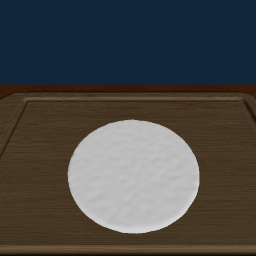

In [4]:
import lzma
import pickle
import numpy as np
import os
from plb.utils.visualization_utils import save_numpy_as_gif
from imitation.env_spec import set_render_mode
np.random.seed(0)
from plb.envs.multitask_env import MultitaskPlasticineEnv
env = MultitaskPlasticineEnv(cfg_path=f'roll_dev.yml', generating_cached_state=True)
set_render_mode(env, 'Roll-v1', 'mesh')
taichi_env = env.taichi_env
np.random.seed(0)
def rand(a, b):
    return np.random.random() * (b - a) + a
N = 100


def randomize_tool_state(cfg, box_min_x, pin_min_y):
    # No change on the init position of the box
#         pos = eval(cfg.PRIMITIVES[1]['init_pos'])
#         box_dist = np.random.rand() * 0.1 + 0.05
#         cfg.PRIMITIVES[1]['init_pos'] = (float(box_min_x + box_dist), pos[1], pos[2])

    pos = eval(cfg.PRIMITIVES[0]['init_pos'])
    height = np.random.rand() * 0.1 
    x_shift = np.random.rand() * 0.1 - 0.05
    new_pos = (float(xs[i] + x_shift), float(pin_min_y+height), pos[2])
    # new_pos = (0.273, 0.2588, 0.5)
    print("tool pos:", new_pos)

    cfg.PRIMITIVES[0]['init_pos'] = new_pos
    print(new_pos)

def case4(cfg):
    capsule_h = 0.025
    r = rand(0.10, 0.11)
    x = rand(0.45, 0.55)
    z = rand(0.45, 0.55)
    pos = eval(cfg.SHAPES[0]['init_pos'])
    new_pos = (x, capsule_h /2 + 0.04, z)
    cfg.SHAPES[0]['shape'] = 'cylinder'
    cfg.SHAPES[0]['radius'] = np.sqrt(r**3 * 4 / 3 / capsule_h)
    cfg.SHAPES[0]['height'] = capsule_h
    cfg.SHAPES[0]['init_pos'] = new_pos
    cfg.SHAPES[0]['init_rot'] = (0.707, 0.707, 0., 0.)
    cfg.PRIMITIVES[0]['init_pos'] = (0.9, 0.8, 0.1)
    # randomize_tool_state(cfg, xs[i] + rs[k], rs[k]*2+0.04+0.05)

target_id =0
target_imgs = []
gifpath = os.path.join(target_path, 'vis_all.gif')
for case_id, case in enumerate([case4]):
    for i in range(N):
        env.reset(target_cfg_modifier=case)
        img = taichi_env.render(mode='rgb', img_size=256)
        state = taichi_env.get_state()
        np.save(os.path.join(target_path, f'target_{target_id}.npy'), taichi_env.simulator.get_x(0))
        save_rgb(os.path.join(target_path, f'target_{target_id}.png'), np.array(img[:, :, :3]).astype(np.float32))
        target_id += 1
        target_imgs.append(img)
np.save(os.path.join(target_path, 'target_imgs.npy'), np.array(target_imgs))
save_numpy_as_gif(np.array(target_imgs)[:, :, :, :3], gifpath)
from IPython.display import Image
Image(gifpath)


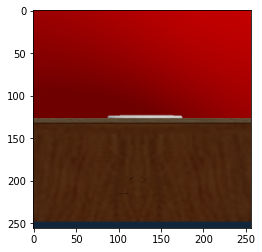

In [5]:
import matplotlib.pyplot as plt
from imitation.env_spec import set_render_mode
env.taichi_env.renderer.update_camera((0.5, 0.04, 0.45), 0., -0., 1.4)
set_render_mode(env, 'Roll-v1', 'mesh')
# taichi_env.renderer.verbose = True
img = taichi_env.render(mode='rgb', img_size=256)
plt.imshow(img[:, :, :3])
# taichi_env.render(mode='human', img_size=256)